In [ ]:
# Correr para reiniciar Kernel y la sesion.
!kill -9 -1

# Proyecto Final (Imagenes)

### Curso Deep Learning y Redes Neuronales - MIIA4406_01

#### Universidad de los Andes

Integrantes:

|Nombre|Codigo|
|---------------------|---------------------|
|Saby Espinel|*201215868*|
|Diego Salazar|*201628925*| <br>
<br>
______________________________________________________________________________________________________________________

In [1]:
# Verificar que se esta usando GPU
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8070790562168079571, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11285974221
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4707813356333598014
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [2]:
!pip install -U -q PyDrive
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
#from sklearn.multiclass import OneVsRestClassifier
#from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
#from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
#from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage import io

## Image transformation and reading
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import files
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Dense, Activation, Dropout, Input
from keras.models import Model

%matplotlib inline

Using TensorFlow backend.


In [ ]:
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
# Verificacion de contenido de carpetas en el Drive con su respectivo ID
#file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
file_list = drive.ListFile({'q': "'1gX_xAhoYwIwmOVRd33lAuf4pCM3cChB6' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: ExampleImgRF.ipynb, id: 1Pg2-wYIUr866PzKvUy8iXsstZT87uE6x
title: images_resize_gray, id: 1AuAOku0WZor-SegS9YWlg0gjqjlguogj
title: images_resize_gray.zip, id: 1mcEsaLxakpcQqYZl1pe_qtIEh4FXj0Wx
title: TextImgDeepLearning.ipynb, id: 1sEAr0qGqVwDkmZJjw4o1UC3owfqykJma
title: images_original, id: 16FnNSHtTQzQBgLbXKs77btkYJrWIH5IF
title: images_original.zip, id: 1_Grjc2zdV2gHA7unPg_I7qTEdM6zl1Ok
title: ExampleTextRF.ipynb, id: 1awW3xWv99qbvcMP1hWTIJjmdmKq8Ku42
title: Proyecto 2_birds_DL (1).ipynb, id: 1mRpiAc1wbDI226Zw56g6NvPHK0ebcACn
title: images.zip, id: 1NMIKcqCHJIDaQi4M9mbjrZf0qlpXtrO-
title: images, id: 1pkD2K630_7_sqyt42vnbOYKVZrnyE-VQ
title: Proyecto2.ipynb, id: 131wvpD2jMHusixkRryXoFdTj9DbmbxYp
title: dataTraining.csv, id: 1SKNGe6FFghASG38LjtUaoTrmozUibRCZ
title: dataTesting.csv, id: 1JWWmvheWnofZl2zqY-7Gu2rJprceYB80
title: .ipynb_checkpoints, id: 17KsfZFar28G8dXPBETs6cCpaAknZO3yP
title: moviegenre.png, id: 1h6OU9y8Fwa-HqLMeVDAhLKO9Et6Bojmv
title: README.md, id: 1ICVh_qZvcAXH3

# Read Images

In [ ]:
# Download a file based on its file ID.
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1NMIKcqCHJIDaQi4M9mbjrZf0qlpXtrO-' # -> cnn_data.zip
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(downloaded['title'])

In [6]:
# Tome las primeras 1025 + 1055 imagenes
!unzip -o images.zip

Archive:  images.zip
   creating: images/
  inflating: images/100.jpeg         
  inflating: images/10005.jpeg       
  inflating: images/10009.jpeg       
  inflating: images/10021.jpeg       
  inflating: images/10026.jpeg       
  inflating: images/10030.jpeg       
  inflating: images/10031.jpeg       
  inflating: images/10036.jpeg       
  inflating: images/10042.jpeg       
  inflating: images/10045.jpeg       
  inflating: images/10047.jpeg       
  inflating: images/10052.jpeg       
  inflating: images/10053.jpeg       
  inflating: images/10061.jpeg       
  inflating: images/10065.jpeg       
  inflating: images/10080.jpeg       
  inflating: images/10096.jpeg       
  inflating: images/10099.jpeg       
  inflating: images/10102.jpeg       
  inflating: images/10112.jpeg       
  inflating: images/10116.jpeg       
  inflating: images/1012.jpeg        
  inflating: images/10124.jpeg       
  inflating: images/10130.jpeg       
  inflating: images/10137.jpeg       
  inflat

In [7]:
!ls

datalab  images  images.zip


In [ ]:
path='images/'
#image = io.imread(os.path.join(path, 'images_resize_gray', str(dataTraining.index[0]) + '_resize_gray.jpeg'))
image = io.imread(os.path.join(path, '7201.jpeg'))

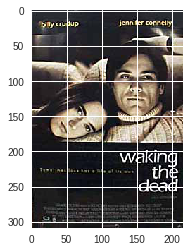

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(image, cmap='gray')

Read all images

In [ ]:
desired_size=200
imgFinal = np.ones((1,200,200,3))
for i in os.listdir('images'):
  if i.startswith('desktop'):
    pass
  else:
    #images_training.append(load_img(os.path.join(path, str(i)),grayscale=False,target_size=None,interpolation='nearest'))
    #image=load_img(os.path.join(path, str(i)),grayscale=False,target_size=None,interpolation='nearest')
    #image=img_to_array(image)
    
    im = cv2.imread(os.path.join(path, str(i)))
    old_size = im.shape[:2] # old_size is in (height, width) format

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(im, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,value=color)
    new_im=new_im.reshape((1,new_im.shape[0],new_im.shape[1],new_im.shape[2]))
    imgFinal = np.concatenate([imgFinal, new_im], axis=0)

# Code for padding: https://jdhao.github.io/2017/11/06/resize-image-to-square-with-padding/

In [ ]:
#imgFinal_2=np.rollaxis(imgFinal, 3, 1) #Para cuando le de la locura al ImageDataGenerator
imgFinal=np.delete(imgFinal, 0, 0)
imgFinal.shape
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
imgFinal_2=imgFinal.reshape((imgFinal.shape[0],200,200,3))
datagen.fit(imgFinal_2)

In [ ]:
images_testing = []
for i in tqdm(dataTesting.index):
    images_testing.append(io.imread(os.path.join(path, 'images_resize_gray', str(i) + '_resize_gray.jpeg')).flatten())

images_testing = np.stack(images_testing)

images_testing.shape, dataTesting.shape[0]

100%|██████████| 3383/3383 [00:02<00:00, 1603.79it/s]


((3383, 40960), 3383)

## Apply PCA -> ZCA

In [ ]:
#pca = PCA(n_components=32)
#images_training_pca = pca.fit_transform(images_training)

In [ ]:
#images_testing_pca = pca.transform(images_testing)

In [315]:
imgFinal.shape

(1026, 3, 224, 224)

In [ ]:
# ZCA whitening
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.set_image_dim_ordering('th')

In [ ]:
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(imgFinal_2)

/usr/local/lib/python3.6/dist-packages/keras/preprocessing/image.py:645: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras/preprocessing/image.py:957: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (2080, 224, 224, 3) (224 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


# Create y

In [ ]:
# Verificacion de contenido de carpetas en el Drive con su respectivo ID
#file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
file_list = drive.ListFile({'q': "'1SKNGe6FFghASG38LjtUaoTrmozUibRCZ' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

In [ ]:
trainDrive = drive.CreateFile({'id': '1SKNGe6FFghASG38LjtUaoTrmozUibRCZ'})
trainDrive.GetContentFile('dataTraining.csv')
dataTraining=pd.read_csv("dataTraining.csv", index_col=0)

testDrive = drive.CreateFile({'id': '1JWWmvheWnofZl2zqY-7Gu2rJprceYB80'})
testDrive.GetContentFile('dataTesting.csv')
dataTesting=pd.read_csv("dataTesting.csv", index_col=0)

In [ ]:
ix_movies = []
for i in range(0,len(os.listdir("images/"))):
  if os.listdir("images/")[i] == "desktop.ini":
    pass
  else:
    ix_movies.append(int(os.listdir("images/")[i].replace(".jpeg","")))

In [15]:
imgFinal_2[[1,2,3,4,5,6]].shape

(6, 224, 224, 3)

In [ ]:
imgTrain=[]
imgTest=[]
data_training=[]
data_testing=[]
for i in range(0,len(ix_movies)):
  try:
    data_training.append(dataTraining.loc[ix_movies[i]])
    imgTrain.append(i)
  except:
    data_testing.append(dataTesting.loc[ix_movies[i]])
    imgTest.append(i)

#ix_movies[2]


#print(dataTraining.iloc[4082])#.index#.loc[ix_movies, :]
#print(dataTraining.iloc[ix_movies[2]])

In [22]:
len(imgTrain)

1432

In [ ]:
imgTraining=imgFinal_2[[imgTrain[:1431]]]

In [22]:
# Son 714 que vienen del dataTraining, es decir, tienen labels definidos y son los
#deben ser usados para seprar en train y test
print(imgTraining.shape)
print(np.array(data_training).shape)

(1432, 224, 224, 3)
(1432, 5)


In [17]:
data_training=pd.DataFrame(data_training)
data_training.head()

,year,title,plot,genres,rating
9873,1981,They All Laughed,new york ' s odyssey detective agency is hired...,"['Comedy', 'Romance']",6.4
856,1958,A Time to Love and a Time to Die,"in N , a company of german soldiers on the ...","['Drama', 'Romance', 'War']",7.8
4384,2001,The Invisible Circus,"in N , at age N , phoebe is unhappy . w...",['Drama'],5.6
2405,1976,Eaten Alive,judd runs the starlight hotel out in some sort...,"['Horror', 'Thriller']",5.4
8005,1983,The Sting II,lonnegan is planning to get back at gondorff a...,"['Comedy', 'Crime']",5.0


In [ ]:
data_training['genres'] = data_training['genres'].map(lambda x: eval(x))

le = MultiLabelBinarizer()
y_genres = le.fit_transform(data_training['genres'])

In [ ]:
imgTesting=imgFinal_2[[imgTest]] #Esto se pueden obviar
imgTesting.shape

In [27]:
y_genres.shape

(1432, 23)

In [ ]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(imgTraining, y_genres[:1431], test_size=0.33, random_state=42)

In [26]:
print(X_train.shape)
print(y_test_genres.shape)

(959, 224, 224, 3)
(473, 23)


# Train multi-class multi-label model

In [29]:
from keras.applications.vgg19 import VGG19
base_modelVGG19 = VGG19(weights='imagenet')
base_modelVGG19.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

574717952/574710816 [==============================] - 21s 0us/step


In [ ]:
def preTrainedModel(base_model):
  x = base_model.output
  x = Dense(256)(x)
  x = Activation("tanh")(x)
  x = Dense(23)(x)
  x = Activation("sigmoid")(x)
  model = Model(inputs=base_model.input, outputs=x)
  model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])
  return model

In [37]:
model = preTrainedModel(base_modelVGG19)

model.fit(X_train, y_train_genres, epochs=5, validation_data=[X_test, y_test_genres])

Train on 959 samples, validate on 473 samples
Epoch 1/5
959/959 [==============================] - 17s 17ms/step - loss: 8.0217 - acc: 0.2294 - val_loss: 7.5052 - val_acc: 0.2410
Epoch 2/5
959/959 [==============================] - 16s 16ms/step - loss: 7.3853 - acc: 0.2503 - val_loss: 7.1981 - val_acc: 0.2410
Epoch 3/5
959/959 [==============================] - 16s 16ms/step - loss: 7.2177 - acc: 0.2503 - val_loss: 7.1597 - val_acc: 0.2410
Epoch 4/5
959/959 [==============================] - 16s 16ms/step - loss: 7.1855 - acc: 0.2503 - val_loss: 7.1379 - val_acc: 0.2410
Epoch 5/5
959/959 [==============================] - 16s 16ms/step - loss: 7.1747 - acc: 0.2503 - val_loss: 7.1283 - val_acc: 0.2410


# Fine Tunning

In [33]:
def fineTune(base_model):
  x = base_model.output
  x = Dense(256)(x)
  x = Activation("tanh")(x)
  x = Dense(23)(x)
  x = Activation("sigmoid")(x)
  model = Model(inputs=base_model.input, outputs=x)
  #model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
  return model

modeltune = fineTune(base_modelVGG19)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_modelVGG19.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
modeltune.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ["accuracy"])

# train the model on the new data for a few epochs
modeltune.fit(X_train, y_train_genres, epochs=5, validation_data=[X_test, y_test_genres])

Train on 959 samples, validate on 473 samples
Epoch 1/5
959/959 [==============================] - 16s 17ms/step - loss: 8.0363 - acc: 0.2158 - val_loss: 7.5117 - val_acc: 0.2410
Epoch 2/5
959/959 [==============================] - 16s 16ms/step - loss: 7.3914 - acc: 0.2503 - val_loss: 7.1991 - val_acc: 0.2410
Epoch 3/5
959/959 [==============================] - 16s 16ms/step - loss: 7.2113 - acc: 0.2503 - val_loss: 7.1556 - val_acc: 0.2410
Epoch 4/5
959/959 [==============================] - 16s 16ms/step - loss: 7.1836 - acc: 0.2503 - val_loss: 7.1390 - val_acc: 0.2410
Epoch 5/5
959/959 [==============================] - 16s 16ms/step - loss: 7.1707 - acc: 0.2503 - val_loss: 7.1368 - val_acc: 0.2410


In [ ]:
# Vamos a escoger las layers de MobileNet para entrenarlas.
for layer in modeltune.layers[:25]:
   layer.trainable = False
for layer in modeltune.layers[25:]:
   layer.trainable = True

In [35]:
# Re-compilamos el modelos para que estas modificaciones tengan efecto
# Usamos SGD y un learning rate bajo
from keras.optimizers import SGD
modeltune.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics = ["accuracy"])

# Entrenamos el modelo nuevamente Esta vez con todo 
#(esta vez ajustando los 2 primeros bloques de inicio junto a las capas superiores de Dense)
modeltune.fit(X_train, y_train_genres, epochs=5, validation_data=[X_test, y_test_genres])

Train on 959 samples, validate on 473 samples
Epoch 1/5
959/959 [==============================] - 16s 17ms/step - loss: 7.1576 - acc: 0.2503 - val_loss: 7.1366 - val_acc: 0.2410
Epoch 2/5
959/959 [==============================] - 16s 16ms/step - loss: 7.1575 - acc: 0.2503 - val_loss: 7.1363 - val_acc: 0.2410
Epoch 3/5
959/959 [==============================] - 16s 16ms/step - loss: 7.1573 - acc: 0.2503 - val_loss: 7.1359 - val_acc: 0.2410
Epoch 4/5
959/959 [==============================] - 16s 16ms/step - loss: 7.1572 - acc: 0.2503 - val_loss: 7.1357 - val_acc: 0.2410
Epoch 5/5
959/959 [==============================] - 16s 16ms/step - loss: 7.1571 - acc: 0.2503 - val_loss: 7.1353 - val_acc: 0.2410


In [58]:
from keras. models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dropout, Dense
model = Sequential()
#model.add(Conv2D(32, (3, 3), input_shape=(200, 200, 3)))
#model.add(Activation('tanh'))
model.add(base_modelVGG19.output)
model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(23))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

TypeError: ignored

In [56]:
model.fit(X_train, y_train_genres, epochs=5, validation_data=[X_test, y_test_genres])

Train on 958 samples, validate on 473 samples
Epoch 1/5
958/958 [==============================] - 41s 43ms/step - loss: 17.6002 - acc: 0.1106 - val_loss: 21.7160 - val_acc: 0.1459
Epoch 2/5
958/958 [==============================] - 32s 34ms/step - loss: 19.1821 - acc: 0.0919 - val_loss: 18.2164 - val_acc: 0.1459
Epoch 3/5
958/958 [==============================] - 32s 34ms/step - loss: 18.6946 - acc: 0.1054 - val_loss: 18.1574 - val_acc: 0.1459
Epoch 4/5
958/958 [==============================] - 32s 34ms/step - loss: 19.0134 - acc: 0.1033 - val_loss: 18.3188 - val_acc: 0.1459
Epoch 5/5
958/958 [==============================] - 32s 34ms/step - loss: 18.7760 - acc: 0.1117 - val_loss: 19.5509 - val_acc: 0.1459


In [ ]:
y_pred_genres = clf.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.5832413775124384

# Apply models to test

In [ ]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres = clf.predict_proba(images_testing_pca)

pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('pred_genres_img_RF.csv', index_label='ID')